In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/2244,1983,702,6322,5957/property/MolecularWeight,XLogP,InChIKey,CanonicalSMILES/CSV"
df = pd.read_csv(url)
print(df)


    CID  MolecularWeight  XLogP                     InChIKey  \
0  2244           180.16    1.2  BSYNRYMUTXBXSQ-UHFFFAOYSA-N   
1  1983           151.16    0.5  RZVAJINKPMORJF-UHFFFAOYSA-N   
2   702            46.07   -0.1  LFQSCWFLJHTTHZ-UHFFFAOYSA-N   
3  6322           174.20   -4.2  ODKSFYDXXFIFQN-BYPYZUCNSA-N   
4  5957           507.18   -5.7  ZKHQWZAMYRWXGA-KQYNXXCUSA-N   

                                     CanonicalSMILES  
0                           CC(=O)OC1=CC=CC=C1C(=O)O  
1                              CC(=O)NC1=CC=C(C=C1)O  
2                                                CCO  
3                             C(CC(C(=O)O)N)CN=C(N)N  
4  C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...  



# Check column names and data types
df.info()

# Check for missing values
df.isnull().sum()

# Overview statistics
df.describe()


In [11]:
# Drop any rows with missing values, if present
df.dropna(inplace=True)

# Rename columns for easier handling (optional)
df.rename(columns={
    'CanonicalSMILES': 'SMILES',
    'MolecularWeight': 'MolWeight'
}, inplace=True)

df.head()


,CID,MolWeight,XLogP,InChIKey,SMILES
0,2244,180.16,1.2,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,CC(=O)OC1=CC=CC=C1C(=O)O
1,1983,151.16,0.5,RZVAJINKPMORJF-UHFFFAOYSA-N,CC(=O)NC1=CC=C(C=C1)O
2,702,46.07,-0.1,LFQSCWFLJHTTHZ-UHFFFAOYSA-N,CCO
3,6322,174.20,-4.2,ODKSFYDXXFIFQN-BYPYZUCNSA-N,C(CC(C(=O)O)N)CN=C(N)N
4,5957,507.18,-5.7,ZKHQWZAMYRWXGA-KQYNXXCUSA-N,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...


In [13]:
print(df.columns)


Index(['CID', 'MolWeight', 'XLogP', 'InChIKey', 'SMILES'], dtype='object')


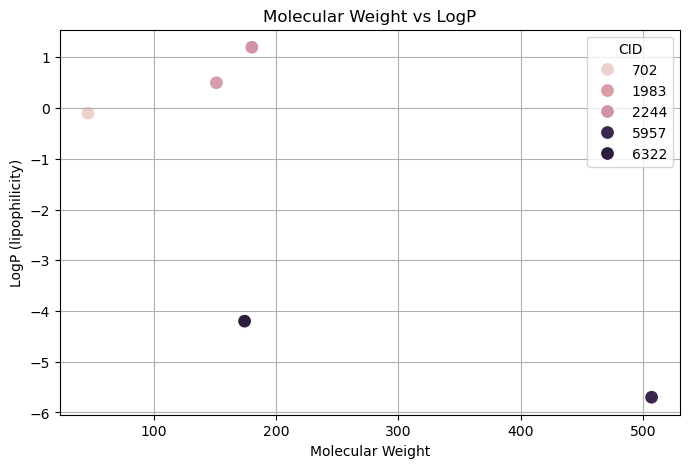

In [24]:

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="MolWeight", y="XLogP", hue="CID", s=100)
plt.title("Molecular Weight vs LogP")
plt.xlabel("Molecular Weight")
plt.ylabel("LogP (lipophilicity)")
plt.grid(True)
plt.show()

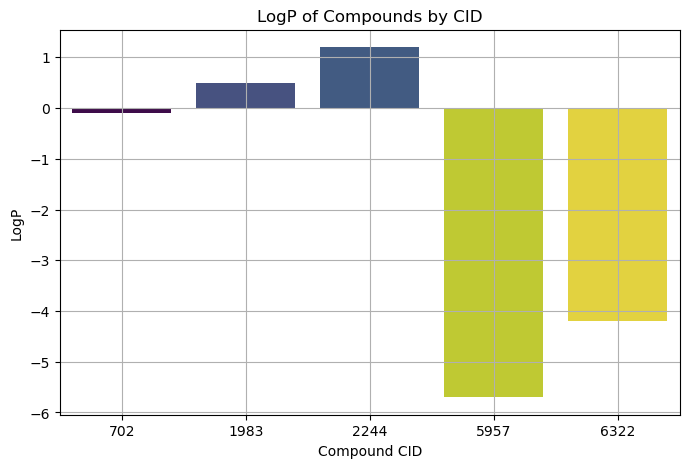

In [27]:

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="CID", y="XLogP", hue="CID", palette="viridis", legend=False)
plt.title("LogP of Compounds by CID")
plt.xlabel("Compound CID")
plt.ylabel("LogP")
plt.grid(True)
plt.show()